Brazil Wildfire Data Analysis

In [ ]:
# imports and setup code
!pip install geopandas
import pandas as pd 
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 31 kB/s 
     |████████████████████████████████| 6.6 MB 14.3 MB/s 


In [ ]:
# original dataframe from .csv
df = pd.read_csv('https://raw.githubusercontent.com/justinabella/gecsummer2021/main/brazil_fires.csv', encoding='ISO-8859-3')
df

year  id      state     month  number        date
0     1998   1       Acre   Janeiro     0.0  1998-01-01
1     1999   1       Acre   Janeiro     0.0  1999-01-01
2     2000   1       Acre   Janeiro     0.0  2000-01-01
3     2001   1       Acre   Janeiro     0.0  2001-01-01
4     2002   1       Acre   Janeiro     0.0  2002-01-01
...    ...  ..        ...       ...     ...         ...
6449  2012  27  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  27  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  27  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  27  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  27  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 6 columns]

In [ ]:
# translate month names from Portuguese to English
for index, row in df.iterrows():
  string = row['month']
  if string=='Janeiro': df.at[index, 'month'] = 'January' 
  elif string=='Fevereiro': df.at[index, 'month'] = 'February'
  elif string=='Março': df.at[index, 'month'] = 'March'
  elif string=='Abril': df.at[index, 'month'] = 'April'
  elif string=='Maio': df.at[index, 'month'] = 'May'
  elif string=='Junho': df.at[index, 'month'] = 'June'
  elif string=='Julho': df.at[index, 'month'] = 'July'
  elif string=='Agosto': df.at[index, 'month'] = 'August'
  elif string=='Setembro': df.at[index, 'month'] = 'September'
  elif string=='Outubro': df.at[index, 'month'] = 'October'
  elif string=='Novembro': df.at[index, 'month'] = 'November'
  elif string=='Dezembro': df.at[index, 'month'] = 'December'

# add proper accentation to state names
# this is needed to match the .csv with the .geojson for the chloropleth
for index, row in df.iterrows():
  string = row['state']
  if string=='Amapa': df.at[index, 'state'] = 'Amapá'
  elif string=='Ceara': df.at[index, 'state'] = 'Ceará'
  elif string=='Espirito Santo': df.at[index, 'state'] = 'Espírito Santo'
  elif string=='Goias': df.at[index, 'state'] = 'Goiás'
  elif string=='Maranhao': df.at[index, 'state'] = 'Maranhão'
  elif string=='Paraiba': df.at[index, 'state'] = 'Paraíba'
  elif string=='Parana': df.at[index, 'state'] = 'Paraná'
  elif string=='Piaui': df.at[index, 'state'] = 'Piauí'
  elif string=='Rondonia': df.at[index, 'state'] = 'Rondônia'
  elif string=='Sao Paulo': df.at[index, 'state'] = 'São Paulo'

# call the cleaned dataframe
df

NameError: ignored

In [ ]:
# form dataframe containing entries in 'March' AND '2001'
df_march2001 = df[(df['year']==2001) & (df['month']=='March')]

# form dataframe containing entries in 'July' AND '2017'
df_july2017 = df[(df['year']==2017) & (df['month']=='July')]

# form dataframe containing entries in 'Rio de Janeiro' AND 'January'
df_rio_january = df[(df['state']=='Rio de Janeiro') & (df['month']=='January')]

# form dataframe containing entries in 'Acre' AND 'October'
df_acre_october = df[(df['state']=='Acre') & (df['month']=='October')]

# un-comment the following for calling a dataframe
# df_march2001
# df_july2017
# df_rio_january
# df_acre_october

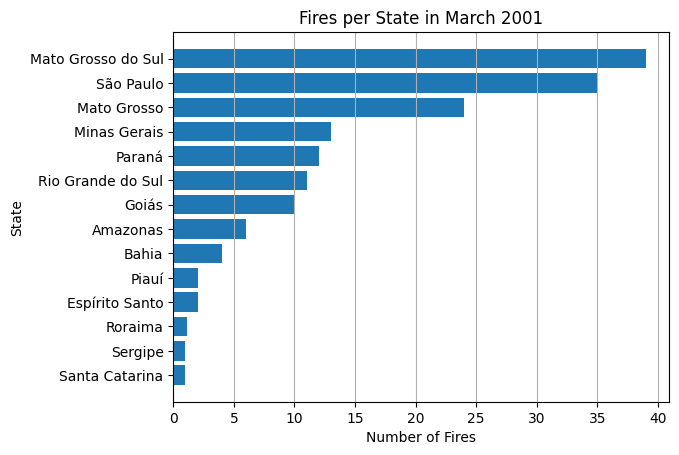

In [ ]:
# create bar graph of number of fires per state in March 2001
df_march2001=df_march2001.sort_values('number')
df_march2001=df_march2001[df_march2001['number']>0]
plt.style.use('default')
plt.barh(df_march2001['state'], df_march2001['number'])
plt.xlabel('Number of Fires')
plt.ylabel('State')
plt.title('Fires per State in March 2001')
plt.grid(axis='x')

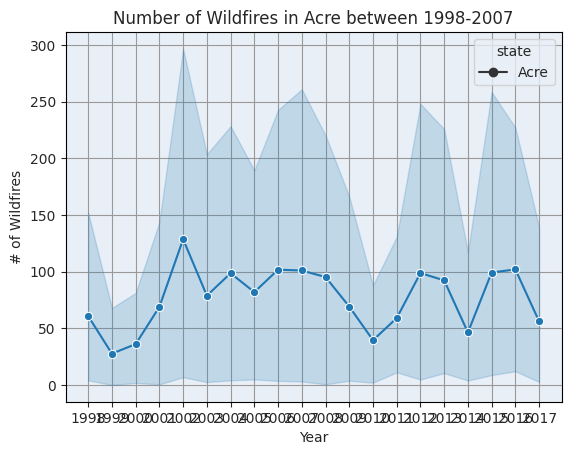

In [ ]:
# create a chart of number of fires in Acre each month of each year
with sns.axes_style('darkgrid', {'grid.color': '.6', 'xtick.bottom': True, 'ytick.left': True, 'axes.facecolor': '#e9eff6', 'axes.edgecolor': 'black'}):
  acre_fires = sns.lineplot(
      data = df[df['state']=='Acre'], 
      x = 'year', 
      y = 'number', 
      style='state', 
      markers=True, 
      dashes=False)
  sns.set(rc={'figure.figsize':(16.7,12.27)}) # if this line does dont function (the x-labels are overlapped), cut it, run it, re-paste, and run again
  acre_fires.set(
      xlabel='Year', 
      ylabel='# of Wildfires', 
      title='Number of Wildfires in Acre between 1998-2007')
  acre_fires.set_xticks(range(1998, 2018))

In [ ]:
# create an outline plot of states
state_geo = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
brazil_map = folium.Map(location=[-14, -52], zoom_start=4)
folium.GeoJson(state_geo).add_to(brazil_map)

# call the plot
brazil_map

In [ ]:
# create chloropleth map of state fires in July 2017
brazil_map = folium.Map(location=[-14, -52], zoom_start=4)
folium.Choropleth(
    geo_data=state_geo,                
    data=df_july2017,                      
    columns=["state", "number"],     
    key_on="feature.properties.name",           
    fill_color="YlOrRd",                    
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Fires",   
    highlight = True                        
    ).add_to(brazil_map)

# call the chloropleth
brazil_map